<a href="https://colab.research.google.com/github/bridgetmanu/Biodiversity/blob/main/source%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read file and familiarize with the content

In [12]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import sqlite3

data1 = pd.read_csv("/content/observations.csv")
data2 = pd.read_csv("/content/species_info.csv")

# clean data
# remove NA values
data1 = data1.dropna()
data2 = data2.dropna()

#remove missing observations


# view dataframe
pd.DataFrame(data1)
pd.DataFrame(data2)


sql = sqlite3.connect("species_info.db")
data2.to_sql("species_info", sql, if_exists = "replace")
con = sql.cursor()

#Use sql to query the DataFrame

def sqlquery(status):
    obs1 = pd.read_sql_query("SELECT * FROM species_info where conservation_status = '" + status + "'", sql)
    obs2 = pd.DataFrame(obs1)
    return obs2
# about 10 of the species in the dataframe are threatened
# about 16 of the species in the dataframe are Endangered

status = input("Enter a conservation status(Options: Threatened; Endangered; In-recovery; Species of Concern): ")
sqlquery(status)




Enter a conservation status(Options: Threatened; Endangered; In-recovery; Species of Concern): Endangered


,index,category,scientific_name,common_names,conservation_status
0,8,Mammal,Canis lupus,Gray Wolf,Endangered
1,9,Mammal,Canis rufus,Red Wolf,Endangered
2,34,Mammal,Myotis grisescens,Gray Myotis,Endangered
3,39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
4,72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
5,173,Bird,Grus americana,Whooping Crane,Endangered
6,276,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
7,343,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered
8,540,Fish,Etheostoma percnurum,Duskytail Darter,Endangered
9,570,Fish,Noturus baileyi,Smoky Madtom,Endangered


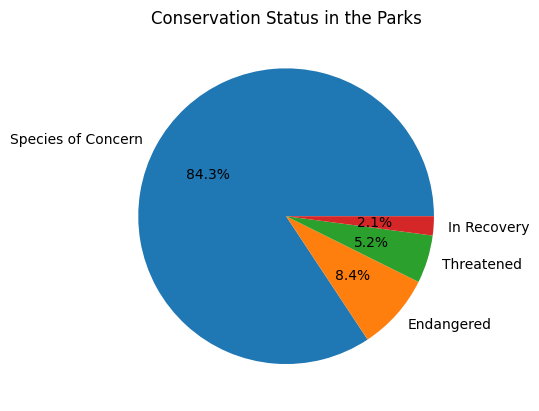

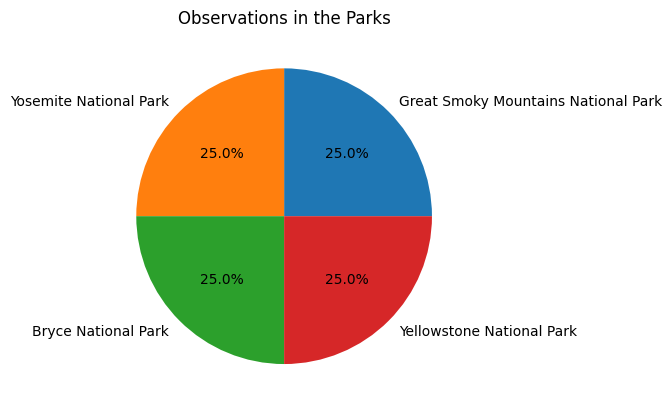

In [7]:
import matplotlib.pyplot as plt

# Pie Chart of Conservation Status in the parks

plt.pie(data2['conservation_status'].value_counts(), labels=data2['conservation_status'].unique(), autopct='%1.1f%%')
plt.title("Conservation Status in the Parks")
plt.show()

# Pie Chart of Ratio of observations in each park
plt.pie(data1['park_name'].value_counts(), labels=data1['park_name'].unique(), autopct='%1.1f%%')
plt.title("Observations in the Parks")
plt.show()


About 84.3% of animals in the park are species of concern;
About 8.4% of the animals are endangered; 5.2% are threatened and 2.1% are in recovery.

There are equal amount of observations from each park


	Are certain types of species more likely to be endangered?
Cannis Lupus (Grey Wolf) are more likely to be endangered;
followed by Cannis rufus (Red Wolf);
Myotis grisescens (Gray Myotis)

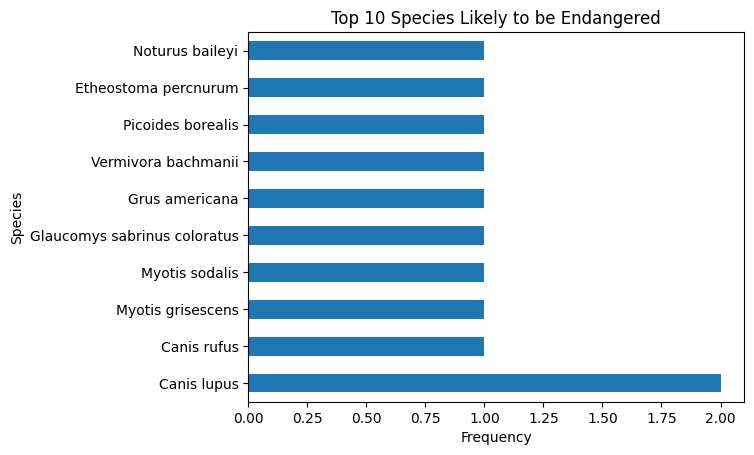

,index,category,scientific_name,common_names,conservation_status
0,8,Mammal,Canis lupus,Gray Wolf,Endangered
1,9,Mammal,Canis rufus,Red Wolf,Endangered
2,34,Mammal,Myotis grisescens,Gray Myotis,Endangered
3,39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
4,72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
5,173,Bird,Grus americana,Whooping Crane,Endangered
6,276,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
7,343,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered
8,540,Fish,Etheostoma percnurum,Duskytail Darter,Endangered
9,570,Fish,Noturus baileyi,Smoky Madtom,Endangered


In [9]:
def sqlquery(status):
    obs = pd.read_sql_query("SELECT * FROM species_info where conservation_status = '" + status + "'", sql)
    obs3 = pd.DataFrame(obs)
    top_5 = obs3['scientific_name'].value_counts().nlargest(10)
    top_5.plot(kind='barh')
    plt.title("Top 10 Species Likely to be "+status)
    plt.xlabel("Frequency")
    plt.ylabel("Species")
    plt.show()
    return obs3

sqlquery(status="Endangered")



Are the differences between species and their conservation status
significant?

yes they are



In [18]:
# join both tables

obs_data=pd.read_sql_query("SELECT * FROM observations order by observations DESC", sql1)

species_data=pd.read_sql_query("SELECT * FROM species_info"  , sql)


merged_data = pd.merge(obs_data, species_data, on='scientific_name', how='outer')
merged_data = merged_data.dropna()

# create a sql database for the merged data
sql2 = sqlite3.connect("merged_data.db")
merged_data.to_sql("merged_data", sql2, if_exists = "replace")
con = sql2.cursor()

#merged_data







,scientific_name,common_names,park_name,observations
0,Bazzania nudicaulis,Bazzania,Yellowstone National Park,268
1,Limosa fedoa,Marbled Godwit,Yellowstone National Park,266
2,Taxidea taxus,"American Badger, Badger",Yellowstone National Park,261
3,Taxidea taxus,Badger,Yellowstone National Park,261
4,Calamagrostis cainii,"Cain's Reed-Bent Grass, Cain's Reed-Grass",Yellowstone National Park,260
5,Falco columbarius,Merlin,Yellowstone National Park,258
6,Plegadis chihi,White-Faced Ibis,Yellowstone National Park,255
7,Percina squamata,Olive Darter,Yellowstone National Park,253
8,Oncorhynchus mykiss,Rainbow Trout,Yellowstone National Park,253
9,Asio otus,Long-Eared Owl,Yellowstone National Park,253


	which species were spotted the most at each park?
**Yellowstone NP**

Lycopodium tristachyum

**GSMNP**

Sonchus asper ssp. asper

**BNP**

Valerianella radiata

**YNP**

Ivesia shockleyi var. shockleyi



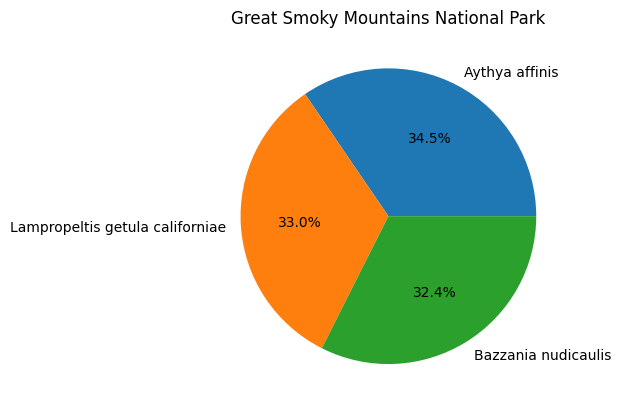

,index,index_x,scientific_name,park_name,observations,index_y,category,common_names,conservation_status
0,20762,394,Aythya affinis,Great Smoky Mountains National Park,115,113.0,Bird,Lesser Scaup,Species of Concern
1,22366,4210,Lampropeltis getula californiae,Great Smoky Mountains National Park,110,4583.0,Reptile,California Kingsnake,Species of Concern
2,4307,12439,Bazzania nudicaulis,Great Smoky Mountains National Park,108,2929.0,Nonvascular Plant,Bazzania,Species of Concern


In [27]:
sql1 = sqlite3.connect("observations.db")
data1.to_sql("observations", sql1, if_exists = "replace")
con = sql1.cursor()

def sqlquery(park):
    obs = pd.read_sql_query("SELECT * FROM merged_data where park_name = '" + park + "' order by observations DESC  limit 3", sql2)
    obs3 = obs.dropna()
    obs3 = pd.DataFrame(obs)
    top_5 = obs3['observations']
    top_5.plot(kind='pie', autopct='%1.1f%%', labels=obs3['scientific_name'])
    plt.ylabel("") # removes the column heading from the pie chart
    plt.title(park)
    plt.show()
    return obs3

"""
 since some of the animals in the observation dataset didn't have common name provided in the species_info dataset,
 I decided to use the merged dataset which consisted of both datasets to be able to drop the NA values
 and get the top 3 species for each park with the most observations which haves common names provided
 in the species_info dataset.
"""


"""
def sqlquery(park):
    obs = pd.read_sql_query("SELECT * FROM observations where park_name = '" + park + "' order by observations DESC  limit 3", sql1)
    obs3 = obs.dropna()
    obs3 = pd.DataFrame(obs)
    top_5 = obs3['observations']
    top_5.plot(kind='pie', autopct='%1.1f%%', labels=obs3['scientific_name'])
    plt.ylabel("") # removes the column heading from the pie chart
    plt.title(park)
    plt.show()
    return obs3
"""

sqlquery(park="Yosemite National Park")
sqlquery(park="Bryce National Park")
sqlquery(park="Great Smoky Mountains National Park")
sqlquery(park="Yellowstone National Park")


# Yosemite National Park
# Bryce National Park
# Great Smoky Mountains National Park
# Yellowstone National Park

	Figure out the common names of the species most sighted at each park
**Yellowstone National Park**

Bazzania nudicaulis - Bazzania

**Great Smoky Mountain National Park**

Aythya affinis - Lesser Scaup

**Bryce National P**

Myotis austroriparius - Mississippi Myotis, Southeastern Myotis

**Yosemite National Park**

Pyrocephalus rubinus - Vermilion Flycatcher



In [30]:


#park = "Yosemite National Park"
#park = "Bryce National Park"
#park = "Great Smoky Mountains National Park"
park = "Yellowstone National Park"


#park = input("Enter a park name(Options: Yosemite National Park; Bryce National Park; Great Smoky Mountains National Park; Yellowstone National Park): ")
new_data=pd.read_sql_query("SELECT scientific_name, common_names, observations, park_name FROM merged_data where park_name = '"+ park +"'order by observations DESC limit 3", sql2)
new_data


,scientific_name,common_names,observations,park_name
0,Bazzania nudicaulis,Bazzania,268,Yellowstone National Park
1,Limosa fedoa,Marbled Godwit,266,Yellowstone National Park
2,Taxidea taxus,"American Badger, Badger",261,Yellowstone National Park
